# File for interactive plotting of High-D quantities (e.g. Polyspectra)

Important: This file currently doesn't work in VSCode (probably some version problem). For correct display, this notebook needs to be started via terminal

## Pentaspectrum

In [1]:
%matplotlib notebook

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, widgets
from matplotlib.colors import LogNorm

In [10]:
# Load data for Pentaspectrum
lbins=5
ells=np.geomspace(150, 40000, lbins)
theta=2/60*np.pi/180
#data_all=np.ones((lbins,lbins,lbins,lbins,lbins,lbins))

data_all=np.loadtxt("/vol/aibn238/data1/llinke/5_Projects/02_3ptStatistics/results_MR/Pentaspec_halomodel")[:,-1]
data_all=data_all.reshape((lbins, lbins, lbins, lbins, lbins, lbins))
theta

0.0005817764173314432

In [11]:
def uhat(l, theta):
    tmp=l*theta
    tmp*=tmp
    result= 0.5*tmp*np.exp(-0.5*tmp)

    return result

In [13]:
# Function for plotting of pentaspectrum
def update_pentaspectrum(l3_ix, l4_ix, l5_ix, l6_ix):
    data_now=data_all[:, :, l3_ix, l4_ix, l5_ix, l6_ix]
    im=ax.imshow(data_now, norm=LogNorm())
    titleobj.set_text(r"$\ell_3={:.1e}, \ell_4={:.1e}, \ell_5={:.1e}, \ell_6={:.1e}$".format(ells[l3_ix], ells[l4_ix], ells[l5_ix], ells[l6_ix]))
    #fig.colorbar(im)
    cbar.update_normal(im)
    fig.canvas.draw()


<IPython.core.display.Javascript object>


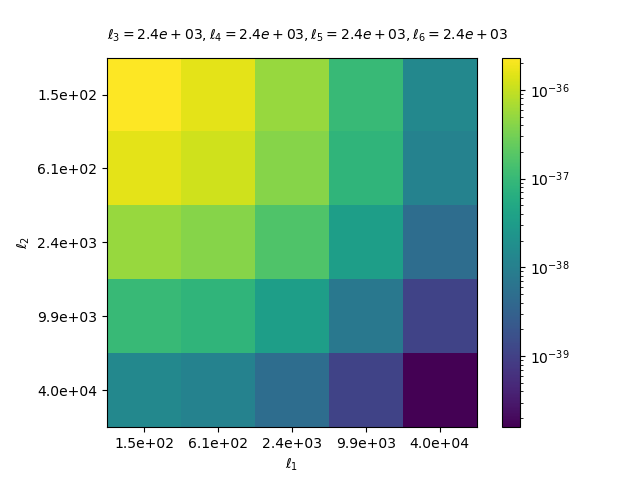

interactive(children=(IntSlider(value=2, description='l3_ix', max=4), IntSlider(value=2, description='l4_ix', …

<function __main__.update_pentaspectrum(l3_ix, l4_ix, l5_ix, l6_ix)>

In [14]:
# Plot Projected Pentaspectrum
fig = plt.figure()
ax=fig.add_subplot(111)
im=ax.imshow(data_all[:,:,0,0,0,0])
ax.set_xlabel(r"$\ell_1$")
ax.set_ylabel(r"$\ell_2$")
ax.set_xticks(range(lbins))
ax.set_yticks(range(lbins))
ax.set_xticklabels([f"{ells[i]:.1e}" for i in range(lbins)])
ax.set_yticklabels([f"{ells[i]:.1e}" for i in range(lbins)])
#ax.set_title("Projected Pentaspectrum")
cbar=fig.colorbar(im)
titleobj=ax.text(-0.5, -0.75, r"$\ell_3={:.2e}$".format(ells[0]), backgroundcolor='#FFFFFF')

interact(update_pentaspectrum,
        l3_ix=(0, lbins-1),
        l4_ix=(0, lbins-1),
        l5_ix=(0, lbins-1),
        l6_ix=(0, lbins-1),
        plotIntegrand=True)



In [61]:
# Load data for Trispectrum
lbins=5
ells=np.geomspace(150, 40000, lbins)
#data_all=np.ones((lbins,lbins,lbins,lbins,lbins,lbins))

data_all=np.loadtxt("/vol/aibn238/data1/llinke/5_Projects/02_3ptStatistics/results_MR/Trispec_halomodel")[:,-1]
data_all=data_all.reshape((lbins, lbins, lbins, lbins))

In [67]:
# Function for plotting of trispectrum
def update_trispectrum(l3_ix, l4_ix):
    data_now=data_all[:, :, l3_ix, l4_ix]
    im=ax.imshow(data_now, norm=LogNorm())
    titleobj.set_text(r"$\ell_3={:.1e}, \ell_4={:.1e}$".format(ells[l3_ix], ells[l4_ix]))
    #fig.colorbar(im)
    cbar.update_normal(im)
    fig.canvas.draw()


<IPython.core.display.Javascript object>


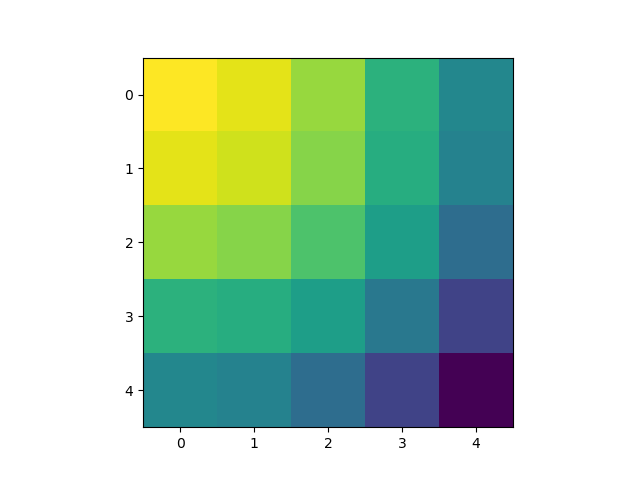

TypeError: Invalid shape (5, 5, 5, 5) for image data

In [68]:
# Plot Projected Trispectrum
fig = plt.figure()
ax=fig.add_subplot(111)
im=ax.imshow(data_all[:,:,0,0])
ax.set_xlabel(r"$\ell_1$")
ax.set_ylabel(r"$\ell_2$")
ax.set_xticks(range(lbins))
ax.set_yticks(range(lbins))
ax.set_xticklabels([f"{ells[i]:.1e}" for i in range(lbins)])
ax.set_yticklabels([f"{ells[i]:.1e}" for i in range(lbins)])
cbar=fig.colorbar(im)
titleobj=ax.text(-0.5, -0.75, r"$\ell_3={:.2e}".format(ells[0]), backgroundcolor='#FFFFFF')

interact(update_trispectrum,
        l3_ix=(0, lbins-1),
        l4_ix=(0, lbins-1))

In [39]:
# Load data for Map6 integrand
lbins=5
ells=np.geomspace(150, 13087.8, lbins)
theta=4/60*np.pi/180
#data_all=np.ones((lbins,lbins,lbins,lbins,lbins,lbins))

data_all=np.loadtxt("/vol/aibn238/data1/llinke/5_Projects/02_3ptStatistics/results_MR/Pentaspec_halomodel")[:,-1]
data_all=data_all.reshape((lbins, lbins, lbins, lbins, lbins, lbins))


for i, ell1 in enumerate(ells):
    for j, ell2 in enumerate(ells):
        for k, ell3 in enumerate(ells):
            for l, ell4 in enumerate(ells):
                for m, ell5 in enumerate(ells):
                    for n, ell6 in enumerate(ells):
                        data_all[i,j,k,l,m,n]=data_all[i,j,k,l,m,n]*uhat(ell1, theta)*uhat(ell2, theta)*uhat(ell3, theta)*uhat(ell4, theta)*uhat(ell5, theta)*uhat(ell6, theta)



In [40]:
# Function for plotting of pintegrand
def update_Map6integrand(l3_ix, l4_ix, l5_ix, l6_ix):
    data_now=data_all[:, :, l3_ix, l4_ix, l5_ix, l6_ix]
    im=ax.imshow(data_now, norm=LogNorm(vmin=1e-45, vmax=1e-40))
    titleobj.set_text(r"$\ell_3={:.1e}, \ell_4={:.1e}, \ell_5={:.1e}, \ell_6={:.1e}$".format(ells[l3_ix], ells[l4_ix], ells[l5_ix], ells[l6_ix]))
    #fig.colorbar(im)
    cbar.update_normal(im)
    fig.canvas.draw()


<IPython.core.display.Javascript object>


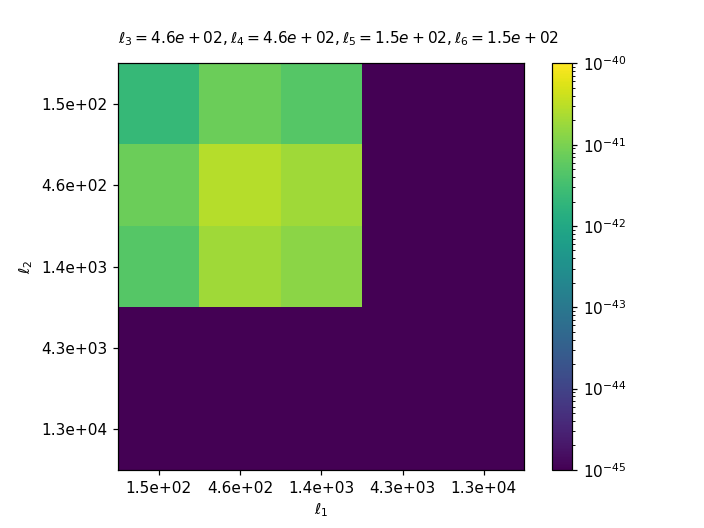

interactive(children=(IntSlider(value=2, description='l3_ix', max=4), IntSlider(value=2, description='l4_ix', …

<function __main__.update_Map6integrand(l3_ix, l4_ix, l5_ix, l6_ix)>

In [41]:
# PlotMap6 integrand
fig = plt.figure()
ax=fig.add_subplot(111)
im=ax.imshow(data_all[:,:,0,0,0,0])
ax.set_xlabel(r"$\ell_1$")
ax.set_ylabel(r"$\ell_2$")
ax.set_xticks(range(lbins))
ax.set_yticks(range(lbins))
ax.set_xticklabels([f"{ells[i]:.1e}" for i in range(lbins)])
ax.set_yticklabels([f"{ells[i]:.1e}" for i in range(lbins)])
#ax.set_title("Projected Pentaspectrum")
cbar=fig.colorbar(im)
titleobj=ax.text(-0.5, -0.75, r"$\ell_3={:.2e}$".format(ells[0]), backgroundcolor='#FFFFFF')

interact(update_Map6integrand,
        l3_ix=(0, lbins-1),
        l4_ix=(0, lbins-1),
        l5_ix=(0, lbins-1),
        l6_ix=(0, lbins-1),
        plotIntegrand=True)